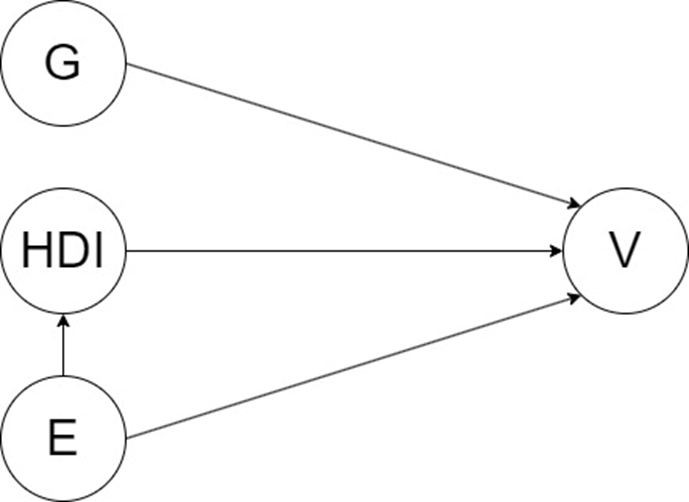

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel
import seaborn as sns
import arviz as az




file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

data.head()


,Year,State,Democratic %,Gun ownership %,HDI,Unemployment %
0,1992,Alabama,0.409,0.552,0.839,0.07525
1,1996,Alabama,0.432,0.568,0.850,0.05208
2,2000,Alabama,0.416,0.538,0.853,0.04625
3,2004,Alabama,0.368,0.516,0.861,0.05575
4,2008,Alabama,0.387,0.503,0.867,0.05883


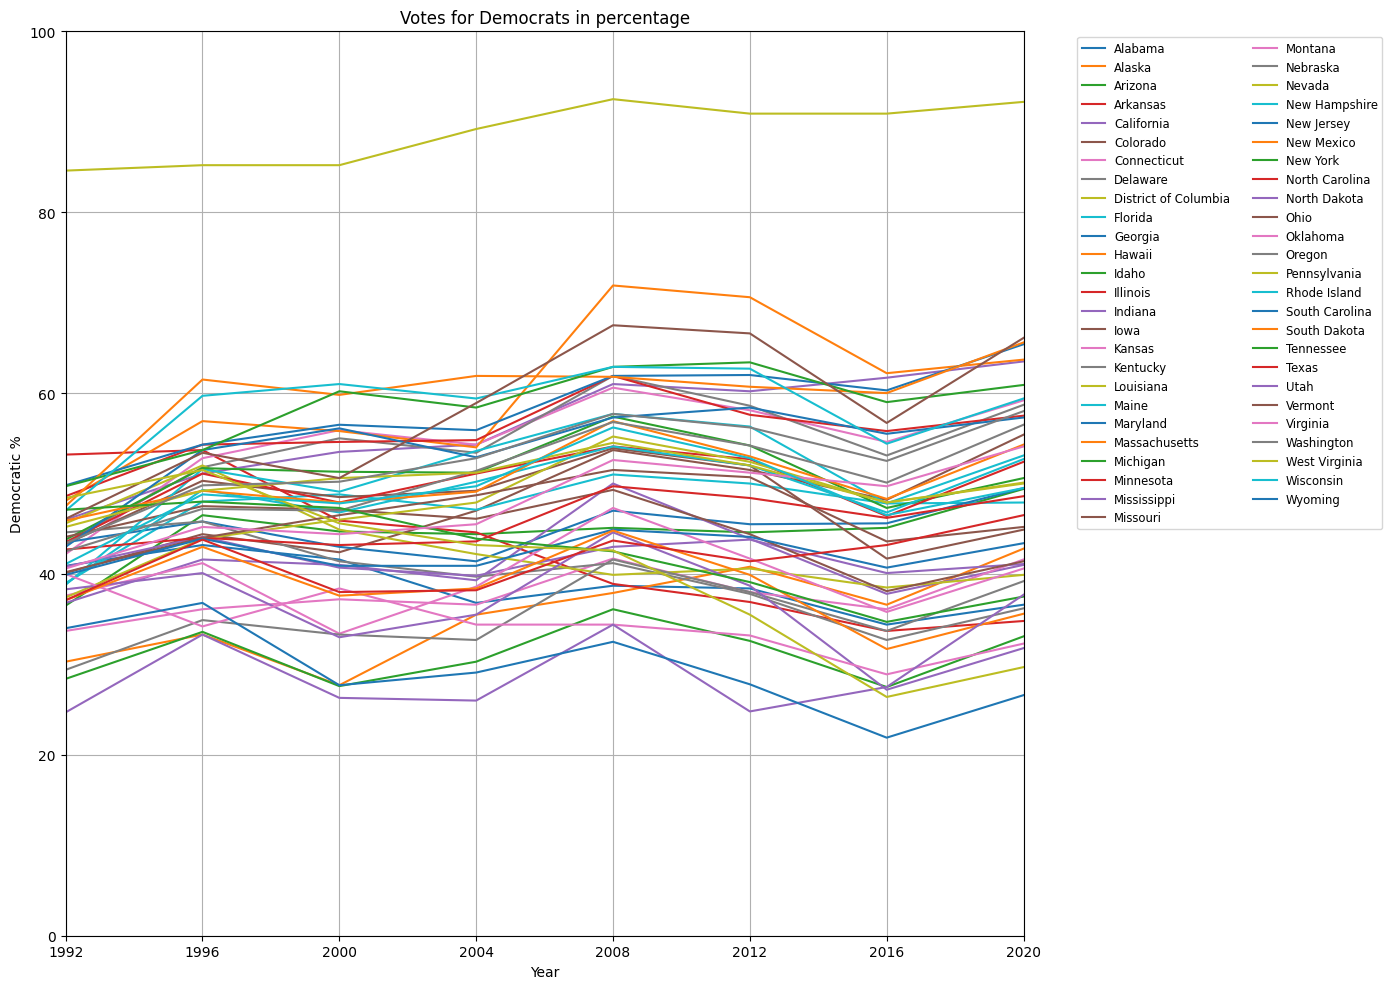

In [3]:
plt.figure(figsize=(14, 10))

for state in data["State"].unique():
    state_data = data[data["State"] == state]
    plt.plot(state_data["Year"], state_data["Democratic %"] * 100, label=state)

plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.xticks(np.linspace(1992, 2020, 8))
plt.xlim([1992, 2020])
plt.ylim([0, 100])
plt.show()


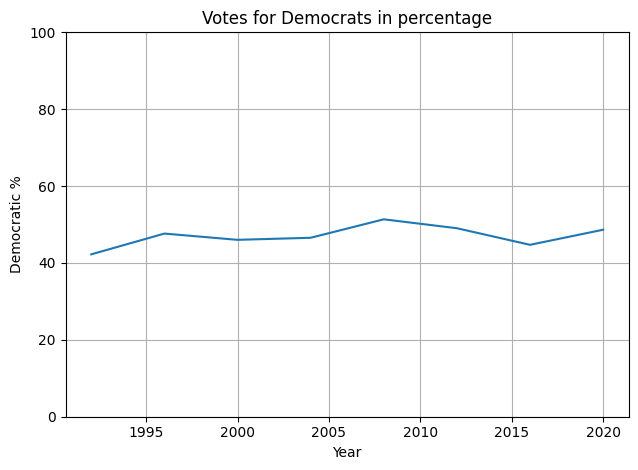

In [4]:
mean_democratic_votes = [data[data['Year'] == year]['Democratic %'].mean()*100 for year in data["Year"].unique()]

plt.plot(data["Year"].unique(), mean_democratic_votes)

plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in percentage')
plt.grid(True)
plt.tight_layout()
# plt.xticks(np.linspace(1992, 2020, 8))
# plt.xlim([1992, 2020])
plt.ylim([0, 100])
plt.show()


## Checking the correlations between the predictors

In [5]:
data = data.dropna()

# Calculate the correlation matrix
correlation_matrix = data[['HDI', 'Gun ownership %', 'Unemployment %', 'Democratic %']].corr()

print(correlation_matrix)

                      HDI  Gun ownership %  Unemployment %  Democratic %
HDI              1.000000        -0.012595       -0.046894      0.337227
Gun ownership % -0.012595         1.000000        0.039930      0.102144
Unemployment %  -0.046894         0.039930        1.000000      0.236900
Democratic %     0.337227         0.102144        0.236900      1.000000


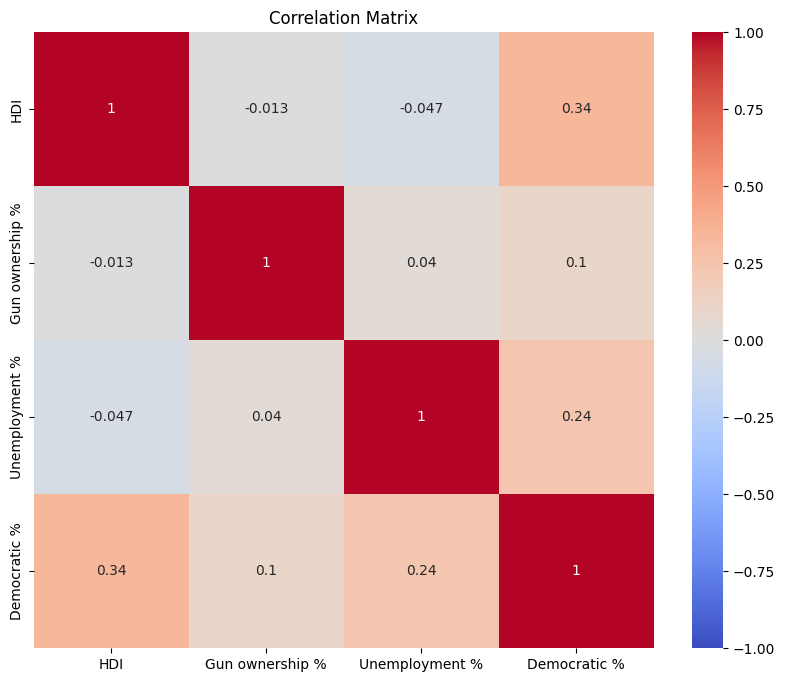

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

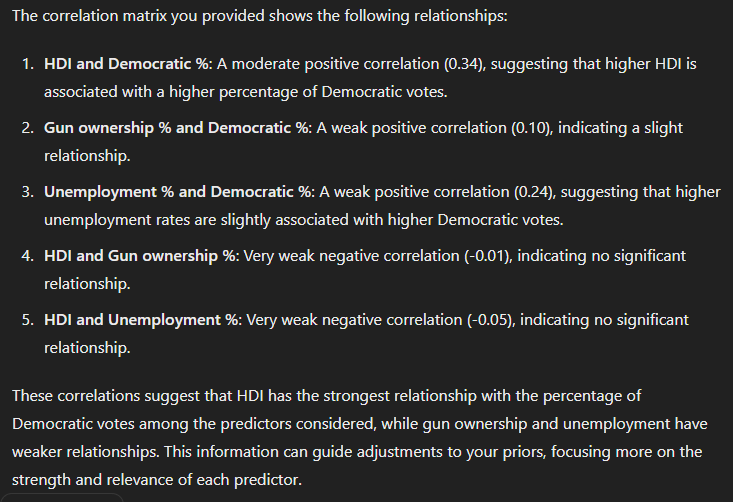

## 1st model - linear model

In [7]:
import pandas as pd
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt

# Load the data
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)
data = data.dropna()
data['Year'] = data['Year'].astype(str).str.strip()

# Prepare data for prior predictive check
stan_data_prior = {
    'N': len(data),
    'HDI': data['HDI'].values,
    'G': data['Gun ownership %'].values
}

# Compile and run the prior predictive model
stan_file_prior = 'model_1_pp.stan'
model_prior = CmdStanModel(stan_file=stan_file_prior)
fit_prior = model_prior.sample(data=stan_data_prior, chains=1, seed=28052020, show_console=True)

16:39:57 - cmdstanpy - INFO - Chain [1] start processing


Chain [1] method = sample (Default)
Chain [1] sample
Chain [1] num_samples = 1000 (Default)
Chain [1] num_warmup = 1000 (Default)
Chain [1] save_warmup = 0 (Default)
Chain [1] thin = 1 (Default)
Chain [1] adapt
Chain [1] engaged = 1 (Default)
Chain [1] gamma = 0.05 (Default)
Chain [1] delta = 0.8 (Default)
Chain [1] kappa = 0.75 (Default)
Chain [1] t0 = 10 (Default)
Chain [1] init_buffer = 75 (Default)
Chain [1] term_buffer = 50 (Default)
Chain [1] window = 25 (Default)
Chain [1] save_metric = 0 (Default)
Chain [1] algorithm = hmc (Default)
Chain [1] hmc
Chain [1] engine = nuts (Default)
Chain [1] nuts
Chain [1] max_depth = 10 (Default)
Chain [1] metric = diag_e (Default)
Chain [1] metric_file =  (Default)
Chain [1] stepsize = 1 (Default)
Chain [1] stepsize_jitter = 0 (Default)
Chain [1] num_chains = 1 (Default)
Chain [1] id = 1 (Default)
Chain [1] data
Chain [1] file = C:\Users\szczy\AppData\Local\Temp\tmp8reik379\s02w4ypl.json
Chain [1] init = 2 (Default)
Chain [1] random
Chain [1] s

16:39:57 - cmdstanpy - INFO - Chain [1] done processing


Chain [1] Iteration: 1700 / 2000 [ 85%]  (Sampling)
Chain [1] Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain [1] Iteration: 1900 / 2000 [ 95%]  (Sampling)
Chain [1] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [1] 
Chain [1] Elapsed Time: 0.023 seconds (Warm-up)
Chain [1] 0.565 seconds (Sampling)
Chain [1] 0.588 seconds (Total)
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 


## Prior Predictive Checks for Parameters

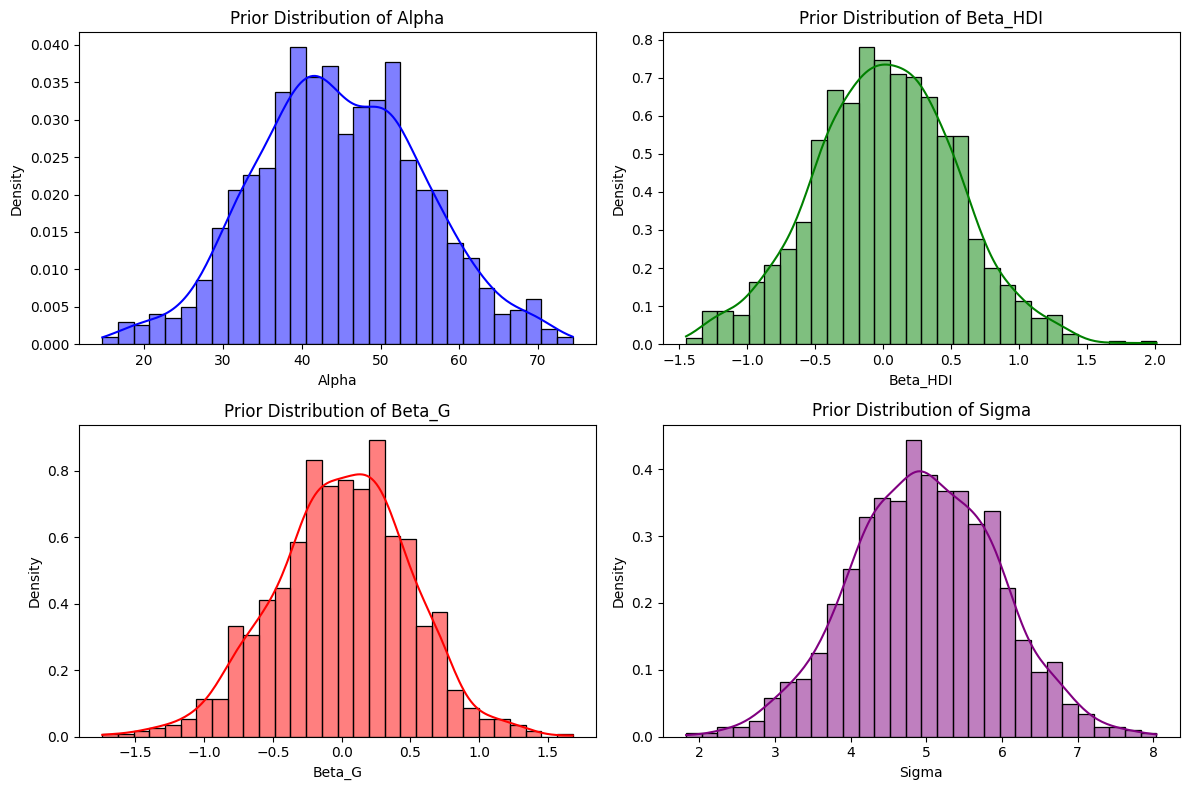

In [8]:
# Simulate parameter values from the priors
n_samples = 1000
alpha_prior = np.random.normal(45, 10, n_samples)
beta_1_prior = np.random.normal(0, 0.5, n_samples)
beta_2_prior = np.random.normal(0, 0.5, n_samples)
sigma_prior = np.random.normal(5, 1, n_samples)

# Ensure sigma values are positive
sigma_prior = sigma_prior[sigma_prior > 0]

# Create a DataFrame for easier manipulation
priors_df = pd.DataFrame({
    'Alpha': alpha_prior,
    'Beta_HDI': beta_1_prior,
    'Beta_G': beta_2_prior,
    'Sigma': sigma_prior
})

# Plot the distributions of the simulated prior values using seaborn
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(priors_df['Alpha'], bins=30, kde=True, stat="density", ax=axes[0, 0], color='blue').set_title('Prior Distribution of Alpha')
sns.histplot(priors_df['Beta_HDI'], bins=30, kde=True, stat="density", ax=axes[0, 1], color='green').set_title('Prior Distribution of Beta_HDI')
sns.histplot(priors_df['Beta_G'], bins=30, kde=True, stat="density", ax=axes[1, 0], color='red').set_title('Prior Distribution of Beta_G')
sns.histplot(priors_df['Sigma'], bins=30, kde=True, stat="density", ax=axes[1, 1], color='purple').set_title('Prior Distribution of Sigma')

plt.tight_layout()
plt.show()

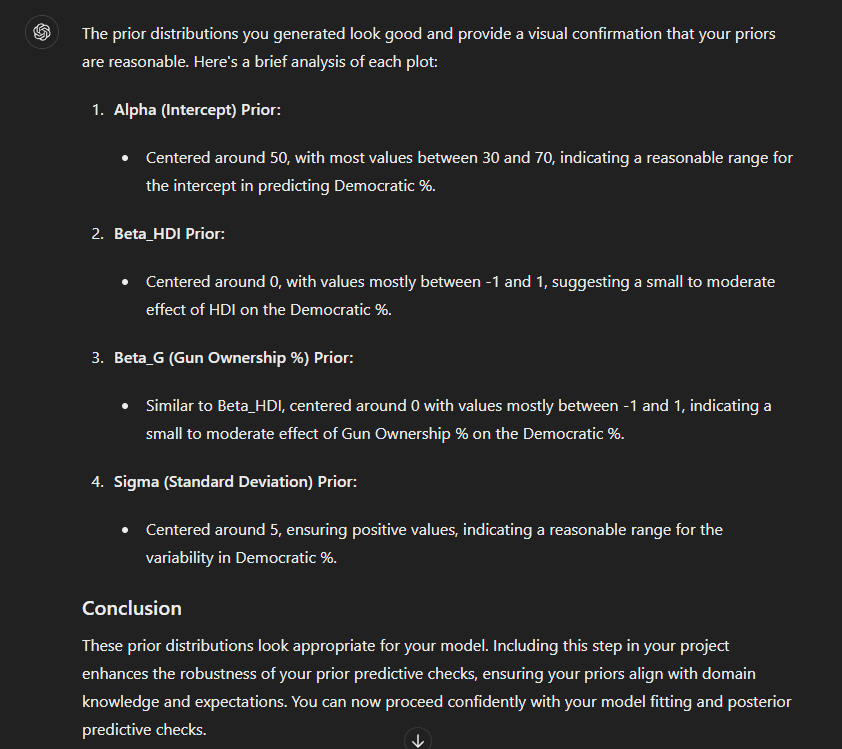
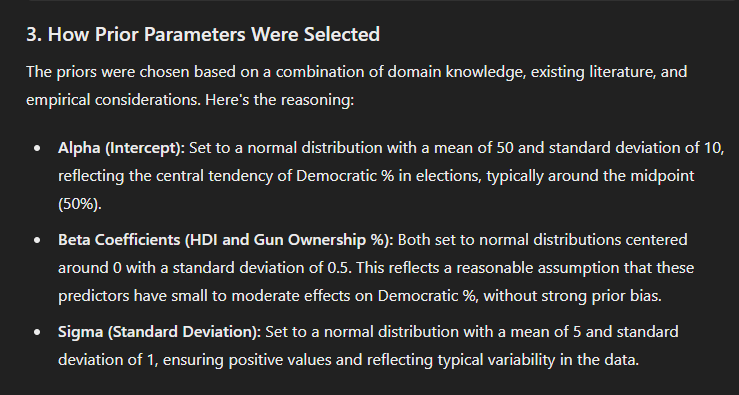

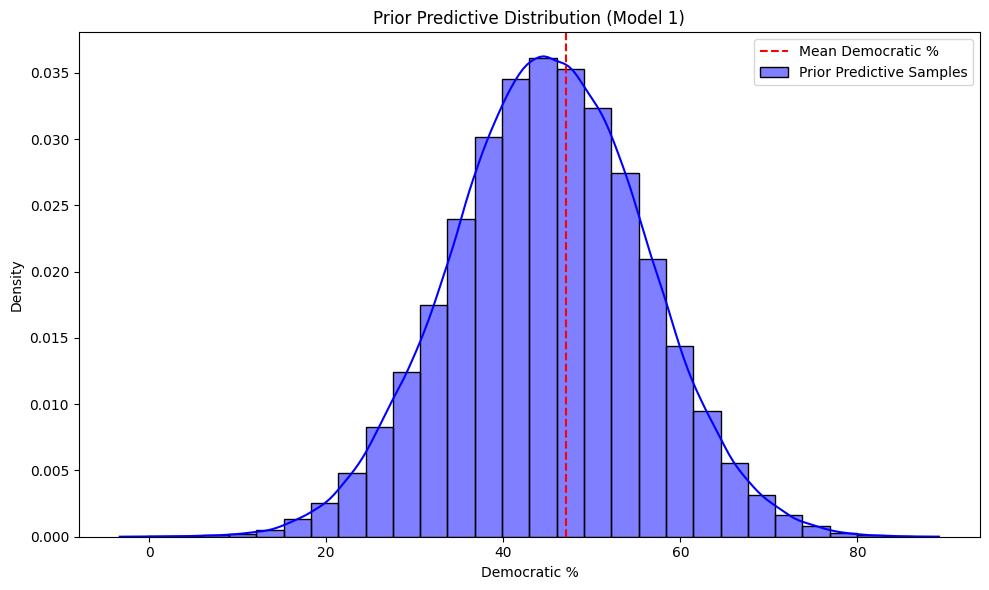

Mean Democratic %: 47.02867647058824
Min Democratic %: 21.9
Max Democratic %: 92.5


In [9]:
# Extract prior predictive samples
y_rep_prior = fit_prior.draws_pd()
y_rep_prior = y_rep_prior.filter(regex='y_rep')

# Flatten the values for plotting
y_rep_prior_flat = y_rep_prior.values.flatten()

# Plot the prior predictive samples using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(y_rep_prior_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Prior Predictive Samples', color='blue')

# Add mean line
mean_democratic_pct = data['Democratic %'].mean() * 100
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')

# Customize the plot
plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Prior Predictive Distribution (Model 1)')
plt.tight_layout()
plt.show()

print(f"Mean Democratic %: {mean_democratic_pct}")
print(f"Min Democratic %: {data['Democratic %'].min() * 100}")
print(f"Max Democratic %: {data['Democratic %'].max() * 100}")

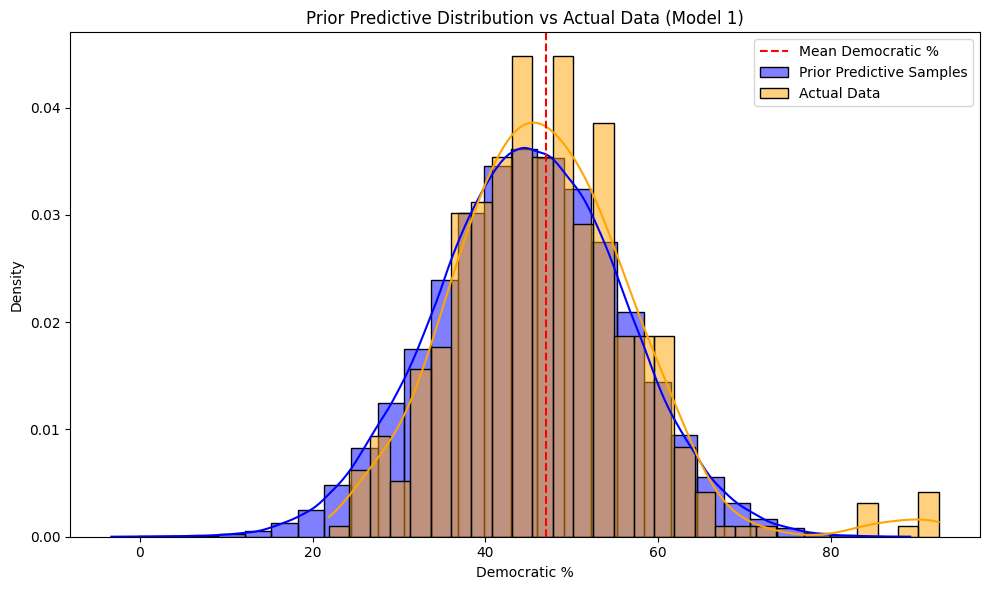

In [10]:
# Plot the prior predictive samples and actual data using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(y_rep_prior_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Prior Predictive Samples', color='blue')
sns.histplot(data['Democratic %'].values * 100, bins=30, kde=True, stat="density", alpha=0.5, label='Actual Data', color='orange')

# Add mean line
mean_democratic_pct = data['Democratic %'].mean() * 100
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')

# Customize the plot
plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Prior Predictive Distribution vs Actual Data (Model 1)')
plt.tight_layout()
plt.show()

## Posterior Analysis for Model 1

In [11]:
# Prepare data for posterior predictive check
stan_data_posterior = {
    'N': len(data),
    'HDI': data['HDI'].values,
    'G': data['Gun ownership %'].values,
    'V': data['Democratic %'].values * 100 # type: ignore
}

# Compile and run the posterior predictive model
stan_file_posterior = 'model_1_posterior.stan'
model_posterior = CmdStanModel(stan_file=stan_file_posterior)
fit_posterior = model_posterior.sample(data=stan_data_posterior, chains=1, seed=28052020, show_console=True)
print(fit_posterior.diagnose())

16:40:08 - cmdstanpy - INFO - Chain [1] start processing


Chain [1] method = sample (Default)
Chain [1] sample
Chain [1] num_samples = 1000 (Default)
Chain [1] num_warmup = 1000 (Default)
Chain [1] save_warmup = 0 (Default)
Chain [1] thin = 1 (Default)
Chain [1] adapt
Chain [1] engaged = 1 (Default)
Chain [1] gamma = 0.05 (Default)
Chain [1] delta = 0.8 (Default)
Chain [1] kappa = 0.75 (Default)
Chain [1] t0 = 10 (Default)
Chain [1] init_buffer = 75 (Default)
Chain [1] term_buffer = 50 (Default)
Chain [1] window = 25 (Default)
Chain [1] save_metric = 0 (Default)
Chain [1] algorithm = hmc (Default)
Chain [1] hmc
Chain [1] engine = nuts (Default)
Chain [1] nuts
Chain [1] max_depth = 10 (Default)
Chain [1] metric = diag_e (Default)
Chain [1] metric_file =  (Default)
Chain [1] stepsize = 1 (Default)
Chain [1] stepsize_jitter = 0 (Default)
Chain [1] num_chains = 1 (Default)
Chain [1] id = 1 (Default)
Chain [1] data
Chain [1] file = C:\Users\szczy\AppData\Local\Temp\tmp8reik379\8afqyrzj.json
Chain [1] init = 2 (Default)
Chain [1] random
Chain [1] s

16:40:10 - cmdstanpy - INFO - Chain [1] done processing


Chain [1] Iteration: 1900 / 2000 [ 95%]  (Sampling)
Chain [1] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [1] 
Chain [1] Elapsed Time: 0.329 seconds (Warm-up)
Chain [1] 1.387 seconds (Sampling)
Chain [1] 1.716 seconds (Total)
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 


16:40:10 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)


Processing csv files: C:\Users\szczy\AppData\Local\Temp\tmp8reik379\model_1_posterioru3z9jp9g\model_1_posterior-20240626164008.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



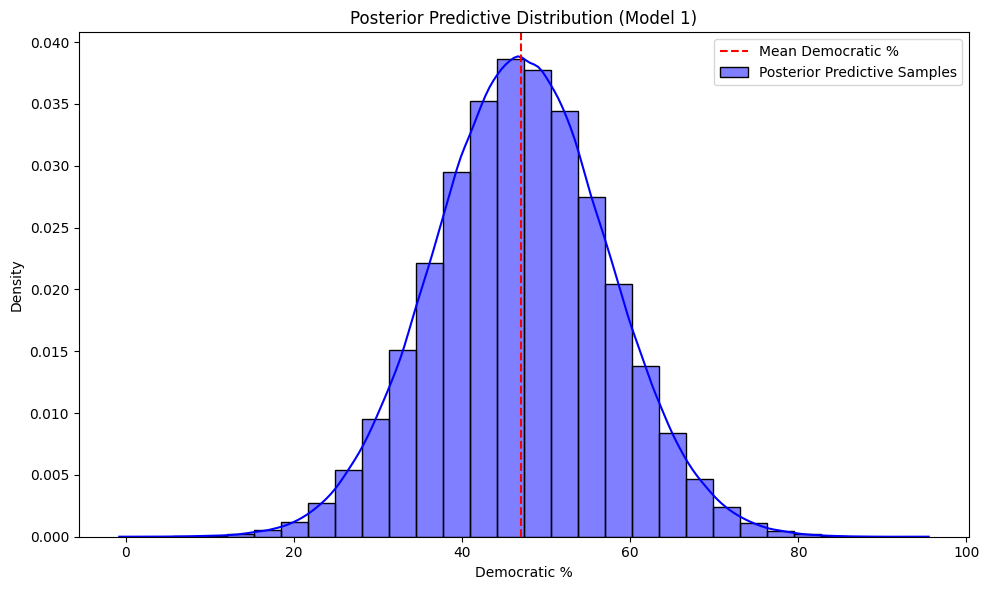

In [12]:
# Extract posterior predictive samples
y_rep_posterior = fit_posterior.draws_pd()
y_rep_posterior = y_rep_posterior.filter(regex='y_rep')

# Flatten the values for plotting
y_rep_posterior_flat = y_rep_posterior.values.flatten()

# Plot the posterior predictive samples using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(y_rep_posterior_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Posterior Predictive Samples', color='blue')

# Add mean line
mean_democratic_pct = data['Democratic %'].mean() * 100
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')

# Customize the plot
plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Posterior Predictive Distribution (Model 1)')
plt.tight_layout()
plt.show()

## Posterior Predictive Distribution Analysis

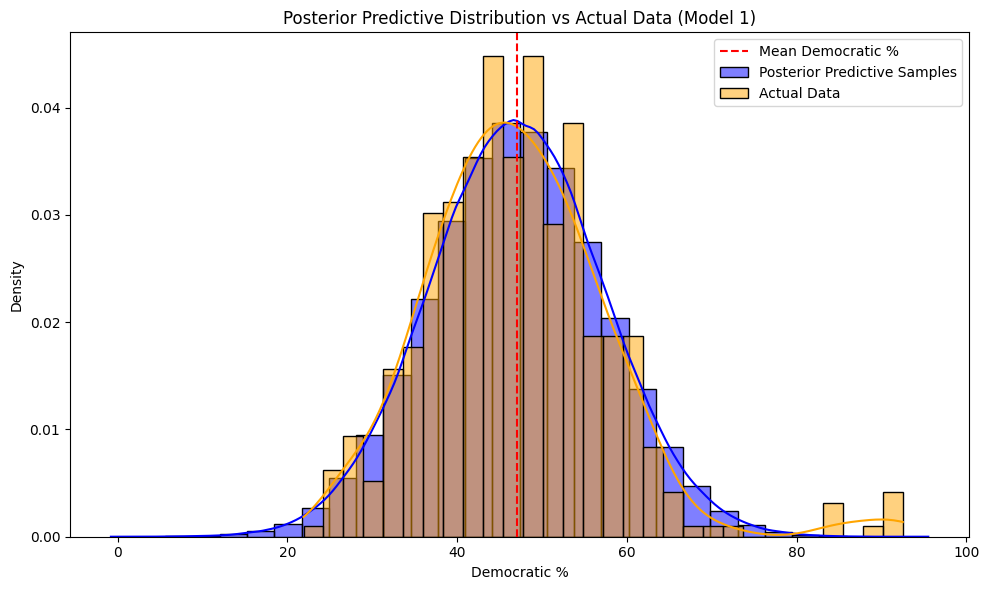

In [13]:
# Flatten the values for plotting
y_rep_posterior_flat = y_rep_posterior.values.flatten()
actual_data_flat = data['Democratic %'].values * 100

# Plot the posterior predictive samples and actual data using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(y_rep_posterior_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Posterior Predictive Samples', color='blue')
sns.histplot(actual_data_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Actual Data', color='orange')

# Add mean line
mean_democratic_pct = data['Democratic %'].mean() * 100
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')

# Customize the plot
plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Posterior Predictive Distribution vs Actual Data (Model 1)')
plt.tight_layout()
plt.show()

## Consistency with Data

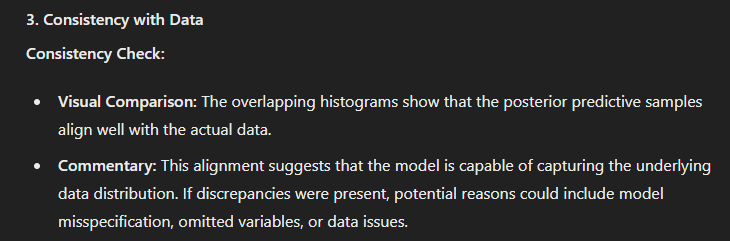

## Parameter Marginal Distributions

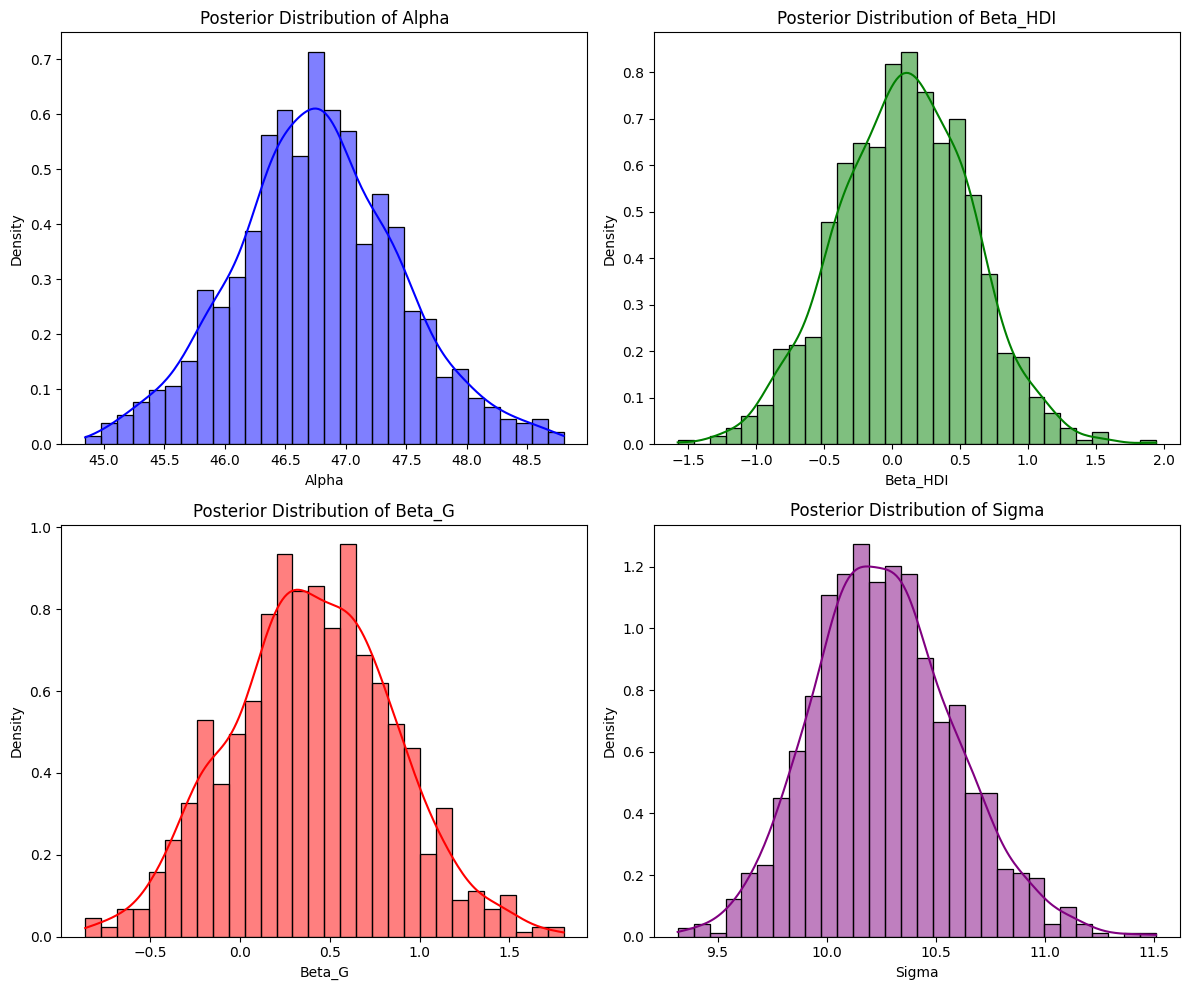

           count       mean       std        min        25%        50%  \
Alpha     1000.0  46.759501  0.684368  44.846100  46.331450  46.755350   
Beta_HDI  1000.0   0.089172  0.489408  -1.575930  -0.248640   0.094529   
Beta_G    1000.0   0.399638  0.450960  -0.860266   0.103520   0.400796   
Sigma     1000.0  10.263646  0.324752   9.317300  10.041175  10.248150   

                75%       max  
Alpha     47.214750  48.80120  
Beta_HDI   0.432769   1.94303  
Beta_G     0.708367   1.80094  
Sigma     10.467650  11.50980  


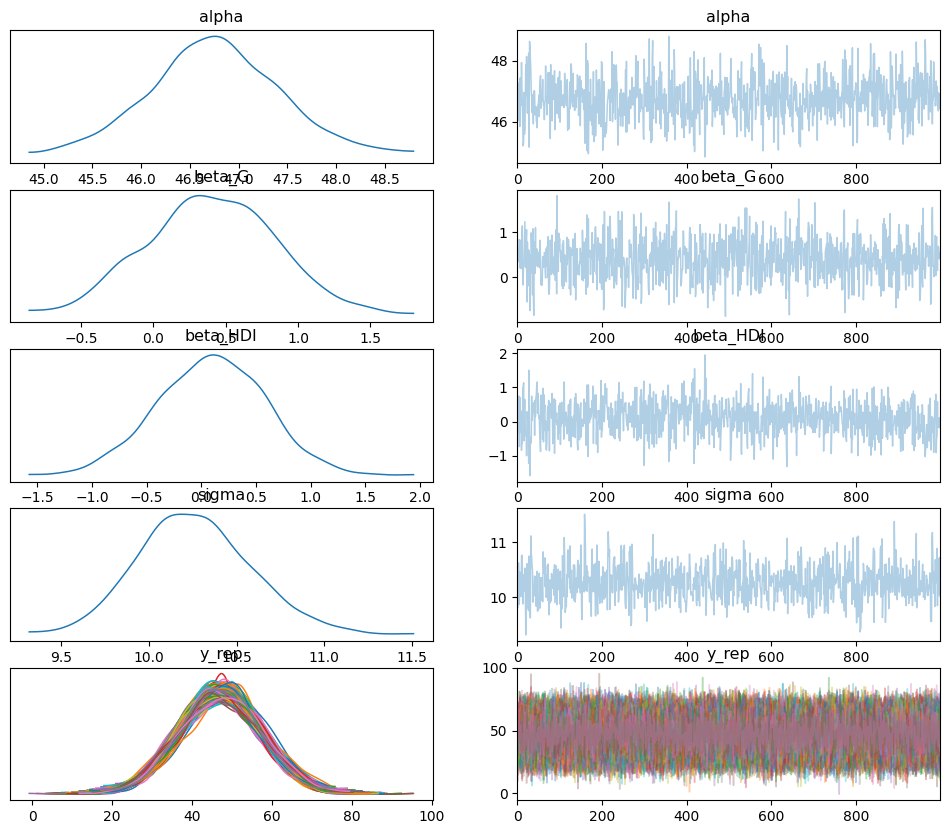

Processing csv files: C:\Users\szczy\AppData\Local\Temp\tmp8reik379\model_1_posterioru3z9jp9g\model_1_posterior-20240626164008.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



In [14]:
# Extract parameter samples for alpha, beta_HDI, beta_G, and sigma
alpha_samples = fit_posterior.stan_variable('alpha')
beta_HDI_samples = fit_posterior.stan_variable('beta_HDI')
beta_G_samples = fit_posterior.stan_variable('beta_G')
sigma_samples = fit_posterior.stan_variable('sigma')

# Create a DataFrame for easier manipulation
params_df = pd.DataFrame({
    'Alpha': alpha_samples,
    'Beta_HDI': beta_HDI_samples,
    'Beta_G': beta_G_samples,
    'Sigma': sigma_samples
})

# Set the number of bins
bins = 30

# Plot histograms of the parameters using seaborn
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(params_df['Alpha'], bins=bins, kde=True, ax=axes[0, 0],stat="density", color='blue').set_title('Posterior Distribution of Alpha')
sns.histplot(params_df['Beta_HDI'], bins=bins, kde=True, ax=axes[0, 1], stat="density", color='green').set_title('Posterior Distribution of Beta_HDI')
sns.histplot(params_df['Beta_G'], bins=bins, kde=True, ax=axes[1, 0], stat="density", color='red').set_title('Posterior Distribution of Beta_G')
sns.histplot(params_df['Sigma'], bins=bins, kde=True, ax=axes[1, 1], stat="density", color='purple').set_title('Posterior Distribution of Sigma')
plt.tight_layout()
plt.show()

# Summarize the parameters
params_summary = params_df.describe().T
print(params_summary)

# Generate trace plots to check for convergence issues
az.plot_trace(fit_posterior)
plt.show()

# Calculate and display the diagnostics
print(fit_posterior.diagnose())

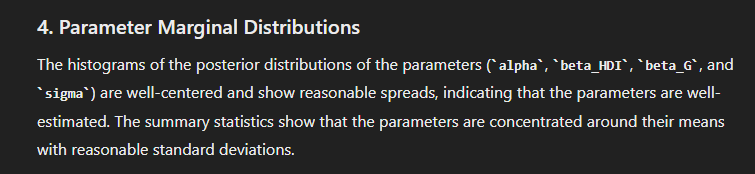

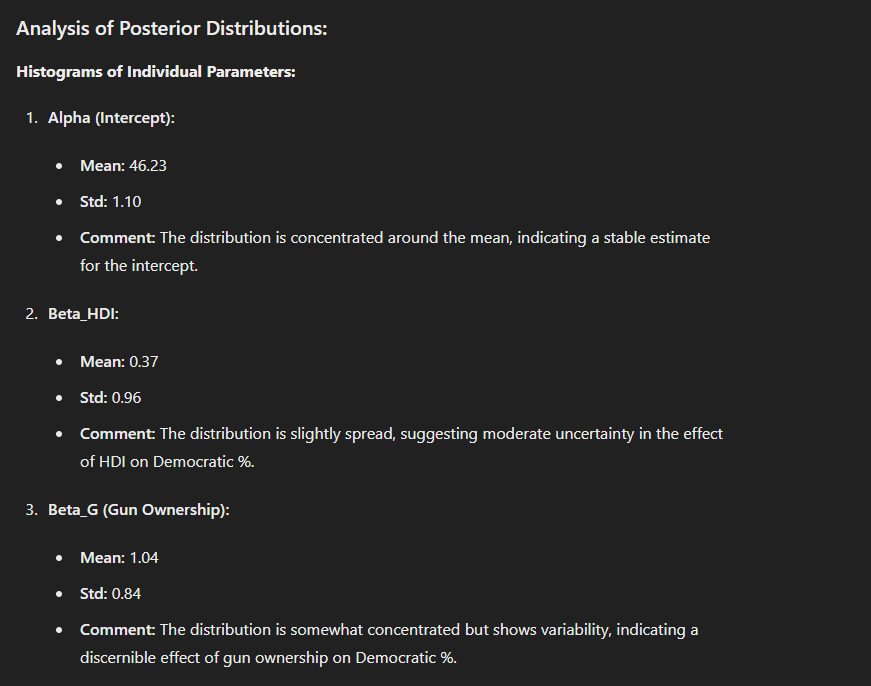

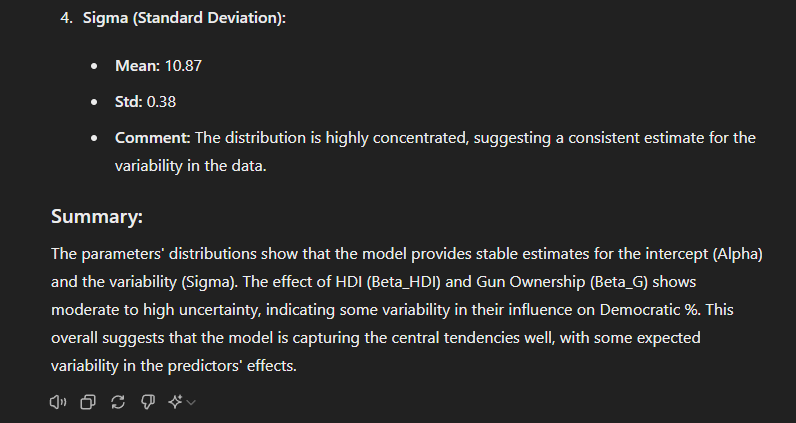

## Testing our final model

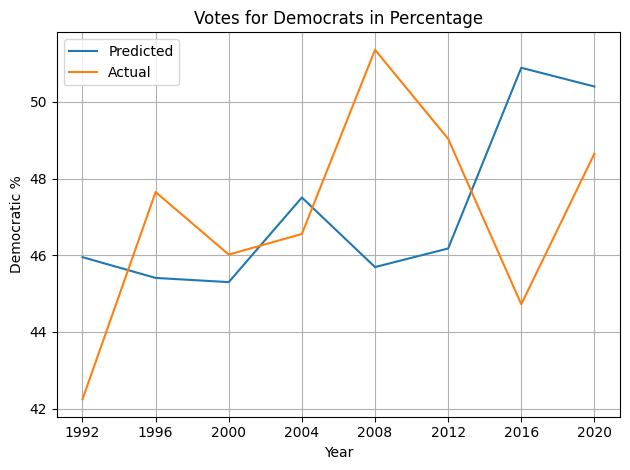

In [15]:
# Set a random seed for reproducibility
np.random.seed(42)

# Extract predicted values from the posterior samples
predicted_democratic_votes = []
for i in range(len(data)):
    sample_value = y_rep_posterior[f'y_rep[{i+1}]'].sample().values[0]
    predicted_democratic_votes.append(sample_value)

# Calculate mean predicted Democratic votes for each year
mean_predicted_democratic_votes = []
unique_years = data['Year'].unique()
for year in unique_years:
    indices = data[data['Year'] == year].index
    mean_value = np.mean([predicted_democratic_votes[i] for i in indices])
    mean_predicted_democratic_votes.append(mean_value)

# Actual mean Democratic votes per year
mean_democratic_votes = data.groupby('Year')['Democratic %'].mean().values * 100

# Plot the results
plt.plot(unique_years, mean_predicted_democratic_votes, label="Predicted")
plt.plot(unique_years, mean_democratic_votes, label="Actual")
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

## Creating training and testing dataframes

In [16]:
data['Year'] = data['Year'].astype(int)

# Split the data into training (1992-2016) and testing (2020) datasets
df_training = data[data['Year'] < 2020]
df_testing = data[data['Year'] == 2020]

# Print the number of rows in training and testing datasets
print(f"Training dataset: {len(df_training)} rows")
print(f"Testing dataset: {len(df_testing)} rows")

# Prepare the data for Stan
stan_data_train = {
    'N': len(df_training),
    'HDI': df_training['HDI'].values,
    'G': df_training['Gun ownership %'].values,
    'V': df_training['Democratic %'].values * 100  # type: ignore
}

stan_data_test = {
    'N': len(df_testing),
    'HDI': df_testing['HDI'].values,
    'G': df_testing['Gun ownership %'].values
}


Training dataset: 357 rows
Testing dataset: 51 rows


## Training the Model on the Training Dataset

In [17]:
# Compile and run the model on the training data
stan_file_train = 'model_1_posterior.stan'
model_train = CmdStanModel(stan_file=stan_file_train)
fit_train = model_train.sample(data=stan_data_train, chains=4, seed=42)

# Extract posterior means for parameters from training model
alpha_train = fit_train.stan_variable('alpha').mean()
beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
beta_G_train = fit_train.stan_variable('beta_G').mean()
sigma_train = fit_train.stan_variable('sigma').mean()

16:40:32 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


16:40:34 - cmdstanpy - INFO - CmdStan done processing.
16:40:34 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
Consider re-running with show_console=True if the above output is unclear!


## Testing the Model on the Testing Dataset

In [18]:
# Extract posterior means for parameters from training model
alpha_train = fit_train.stan_variable('alpha').mean()
beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
beta_G_train = fit_train.stan_variable('beta_G').mean()

# Predict the Democratic votes for each state in 2020
predicted_votes_test = alpha_train + beta_HDI_train * df_testing['HDI'] + beta_G_train * df_testing['Gun ownership %']

# Calculate the mean predicted Democratic votes for the whole country in 2020
mean_predicted_votes_2020 = predicted_votes_test.mean()

# Calculate the actual mean Democratic votes for the whole country in 2020
mean_actual_votes_2020 = df_testing['Democratic %'].mean() * 100

# Print the results
print(f"Predicted mean Democratic votes for the whole country in 2020: {mean_predicted_votes_2020:.2f}%")
print(f"Actual mean Democratic votes for the whole country in 2020: {mean_actual_votes_2020:.2f}%")

Predicted mean Democratic votes for the whole country in 2020: 46.77%
Actual mean Democratic votes for the whole country in 2020: 48.65%


## MAE, MSE, RMSE, R2

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae = mean_absolute_error(df_testing['Democratic %'].values * 100, predicted_votes_test)
mse = mean_squared_error(df_testing['Democratic %'].values * 100, predicted_votes_test)
rmse = np.sqrt(mse)
r2 = r2_score(df_testing['Democratic %'].values * 100, predicted_votes_test)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error (MAE): 9.576718685985215
Mean Squared Error (MSE): 146.61477169063312
Root Mean Squared Error (RMSE): 12.108458683525047
R-squared: -0.03141492926090761


# Dodać wykres z predykcji dla każdego roku bądź dla stanów - każdy z testowego

Training dataset: 357 rows
Testing dataset: 51 rows


16:40:36 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)
chain 1 |██████████| 00:01 Iteration: 1900 / 2000 [ 95%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


16:40:37 - cmdstanpy - INFO - CmdStan done processing.
16:40:37 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 1992: 47.69%
Actual mean Democratic votes for 1992: 42.25%
Training dataset: 357 rows
Testing dataset: 51 rows


16:40:38 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


16:40:40 - cmdstanpy - INFO - CmdStan done processing.
16:40:40 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 1996: 46.93%
Actual mean Democratic votes for 1996: 47.65%
Training dataset: 357 rows
Testing dataset: 51 rows


16:40:41 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


16:40:43 - cmdstanpy - INFO - CmdStan done processing.
16:40:43 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 2000: 47.15%
Actual mean Democratic votes for 2000: 46.02%
Training dataset: 357 rows
Testing dataset: 51 rows


16:40:44 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)



chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |██████████| 00:01 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


16:40:45 - cmdstanpy - INFO - CmdStan done processing.
16:40:45 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 2004: 47.04%
Actual mean Democratic votes for 2004: 46.55%
Training dataset: 357 rows
Testing dataset: 51 rows


16:40:46 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)
chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


16:40:48 - cmdstanpy - INFO - CmdStan done processing.
16:40:48 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 2008: 46.38%
Actual mean Democratic votes for 2008: 51.36%
Training dataset: 357 rows
Testing dataset: 51 rows


16:40:49 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


16:40:50 - cmdstanpy - INFO - CmdStan done processing.
16:40:51 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 2012: 46.73%
Actual mean Democratic votes for 2012: 49.04%
Training dataset: 357 rows
Testing dataset: 51 rows


16:40:52 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


16:40:53 - cmdstanpy - INFO - CmdStan done processing.
16:40:53 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 2016: 47.35%
Actual mean Democratic votes for 2016: 44.72%
Training dataset: 357 rows
Testing dataset: 51 rows


16:40:54 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


16:40:56 - cmdstanpy - INFO - CmdStan done processing.
16:40:56 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1_posterior.stan', line 22, column 2 to column 57)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 2020: 46.77%
Actual mean Democratic votes for 2020: 48.65%


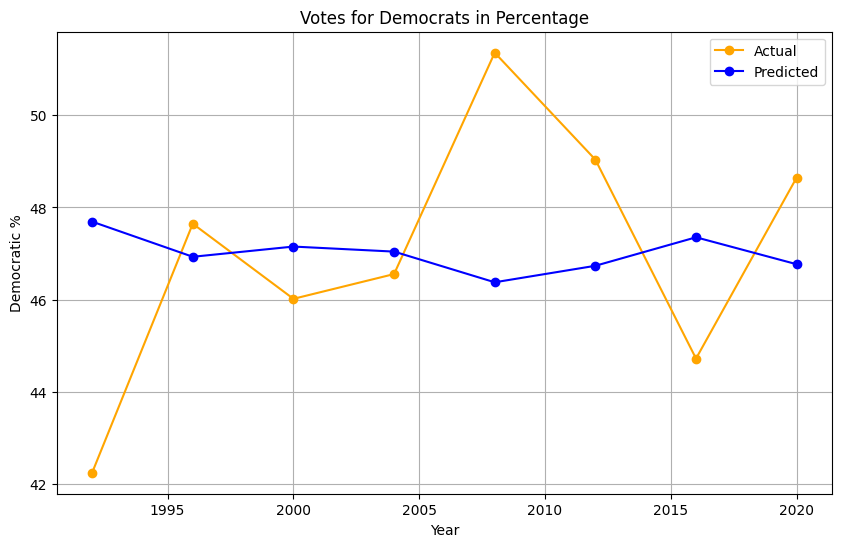

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

data['Year'] = data['Year'].astype(int)

# Function to train the model and predict for a specific year
def train_and_predict(year):
    df_training = data[data['Year'] != year]
    df_testing = data[data['Year'] == year]

    print(f"Training dataset: {len(df_training)} rows")
    print(f"Testing dataset: {len(df_testing)} rows")

    stan_data_train = {
        'N': len(df_training),
        'HDI': df_training['HDI'].values,
        'G': df_training['Gun ownership %'].values,
        'V': df_training['Democratic %'].values * 100  # type: ignore
    }

    stan_file_train = 'model_1_posterior.stan'
    model_train = CmdStanModel(stan_file=stan_file_train)
    fit_train = model_train.sample(data=stan_data_train, chains=4, seed=42)

    alpha_train = fit_train.stan_variable('alpha').mean()
    beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
    beta_G_train = fit_train.stan_variable('beta_G').mean()

    predicted_votes_test = alpha_train + beta_HDI_train * df_testing['HDI'] + beta_G_train * df_testing['Gun ownership %']
    mean_predicted_votes = predicted_votes_test.mean()
    mean_actual_votes = df_testing['Democratic %'].mean() * 100

    print(f"Predicted mean Democratic votes for {year}: {mean_predicted_votes:.2f}%")
    print(f"Actual mean Democratic votes for {year}: {mean_actual_votes:.2f}%")

    return mean_predicted_votes, mean_actual_votes

years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
all_predicted_votes = []
all_actual_votes = []

for year in years:
    predicted, actual = train_and_predict(year)
    all_predicted_votes.append(predicted)
    all_actual_votes.append(actual)

plt.figure(figsize=(10, 6))
plt.plot(years, all_actual_votes, label='Actual', color='orange', marker='o')
plt.plot(years, all_predicted_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()

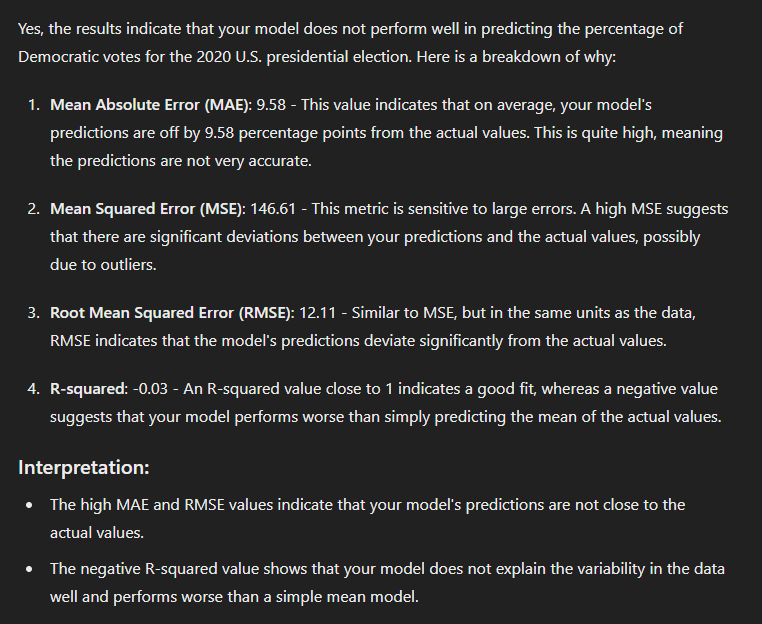

## 2nd model - Polynomial Regression Model

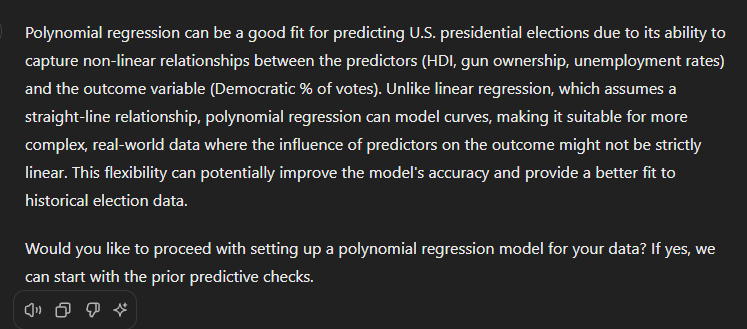

## Prior predictive checks

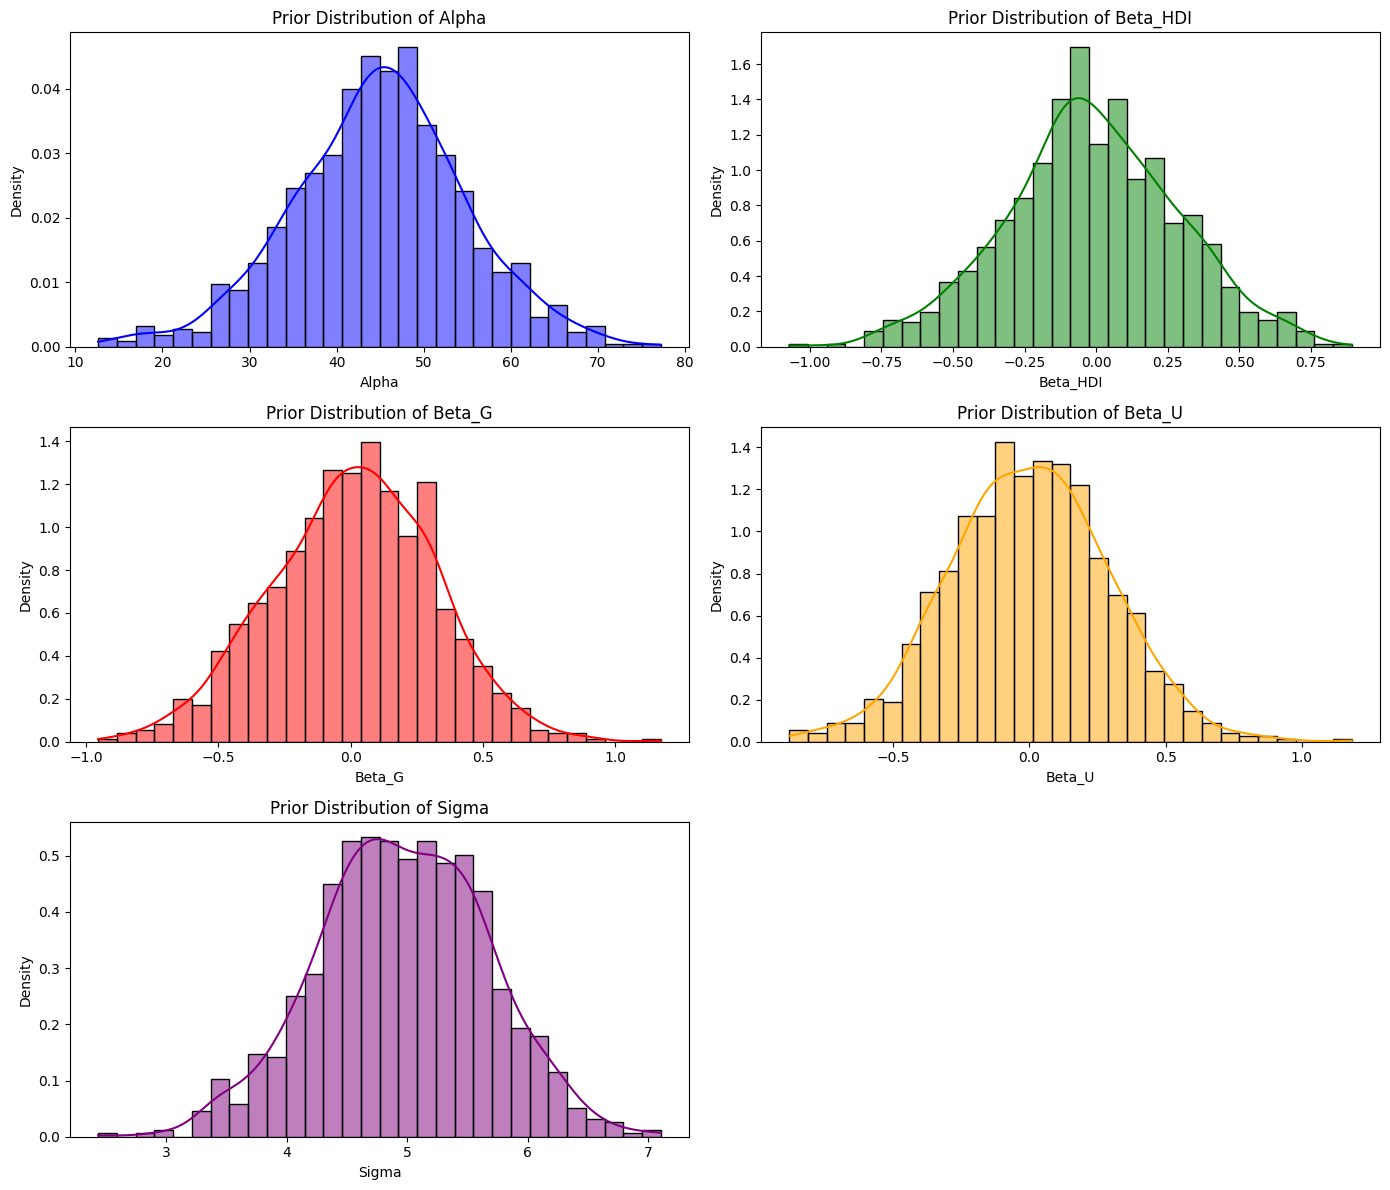

In [21]:
# Simulate parameter values from the priors
n_samples = 1000
alpha_prior = np.random.normal(45, 10, n_samples)
beta_HDI_prior = np.random.normal(0, 0.3, n_samples)
beta_G_prior = np.random.normal(0, 0.3, n_samples)
beta_U_prior = np.random.normal(0, 0.3, n_samples)
sigma_prior = np.random.normal(5, 0.7, n_samples)

# Ensure sigma values are positive
sigma_prior = sigma_prior[sigma_prior > 0]

# Create a DataFrame for easier manipulation
priors_df = pd.DataFrame({
    'Alpha': alpha_prior,
    'Beta_HDI': beta_HDI_prior,
    'Beta_G': beta_G_prior,
    'Beta_U': beta_U_prior,
    'Sigma': sigma_prior
})

# Plot the distributions of the simulated prior values using seaborn
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

sns.histplot(priors_df['Alpha'], bins=30, kde=True, stat="density", ax=axes[0, 0], color='blue').set_title('Prior Distribution of Alpha')
sns.histplot(priors_df['Beta_HDI'], bins=30, kde=True, stat="density", ax=axes[0, 1], color='green').set_title('Prior Distribution of Beta_HDI')
sns.histplot(priors_df['Beta_G'], bins=30, kde=True, stat="density", ax=axes[1, 0], color='red').set_title('Prior Distribution of Beta_G')
sns.histplot(priors_df['Beta_U'], bins=30, kde=True, stat="density", ax=axes[1, 1], color='orange').set_title('Prior Distribution of Beta_U')
sns.histplot(priors_df['Sigma'], bins=30, kde=True, stat="density", ax=axes[2, 0], color='purple').set_title('Prior Distribution of Sigma')

# Remove the last subplot which is empty
fig.delaxes(axes[2][1])

plt.tight_layout()
plt.show()

In [22]:
# Load and prepare the data
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)
data = data.dropna()

# Prepare the data for Stan
stan_data = {
    'N': len(data),
    'HDI': data['HDI'].values,
    'G': data['Gun ownership %'].values,
    'U': data['Unemployment %'].values
}

# Compile the Stan model
stan_file = 'polynomial_prior_model.stan'
model = CmdStanModel(stan_file=stan_file)

# Run the prior predictive checks
fit_prior = model.sample(data=stan_data, chains=1, iter_sampling=1000, seed=42)

16:40:59 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                       


16:41:00 - cmdstanpy - INFO - CmdStan done processing.


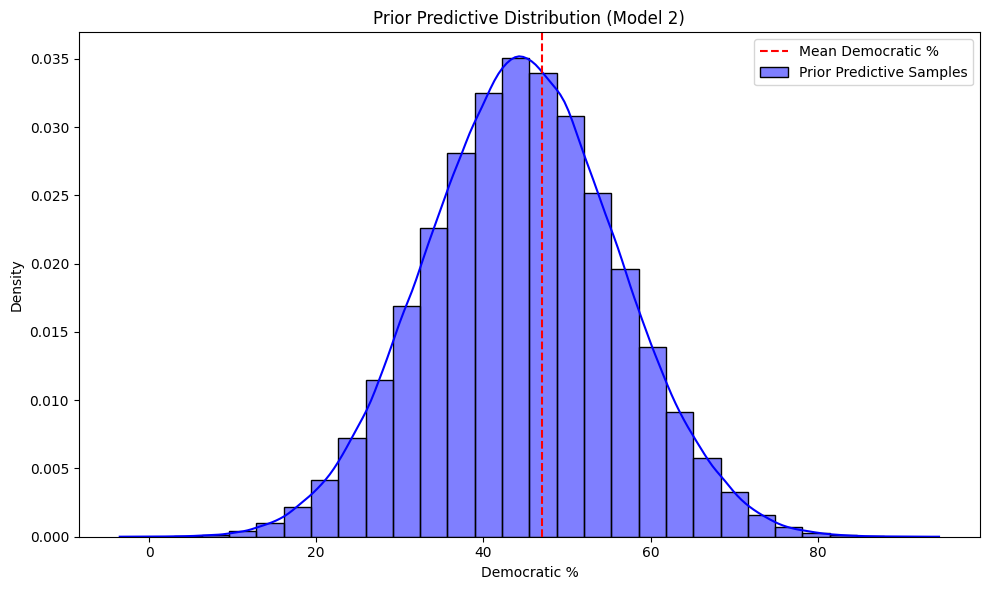

Mean Democratic %: 47.02867647058824
Min Democratic %: 21.9
Max Democratic %: 92.5


In [23]:
# Extract prior predictive samples
y_rep_prior = fit_prior.draws_pd()
y_rep_prior = y_rep_prior.filter(regex='y_rep')

# Flatten the values for plotting
y_rep_prior_flat = y_rep_prior.values.flatten()

# Plot the prior predictive samples using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(y_rep_prior_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Prior Predictive Samples', color='blue')

# Add mean line
mean_democratic_pct = data['Democratic %'].mean() * 100
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')

# Customize the plot
plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Prior Predictive Distribution (Model 2)')
plt.tight_layout()
plt.show()

print(f"Mean Democratic %: {mean_democratic_pct}")
print(f"Min Democratic %: {data['Democratic %'].min() * 100}")
print(f"Max Democratic %: {data['Democratic %'].max() * 100}")

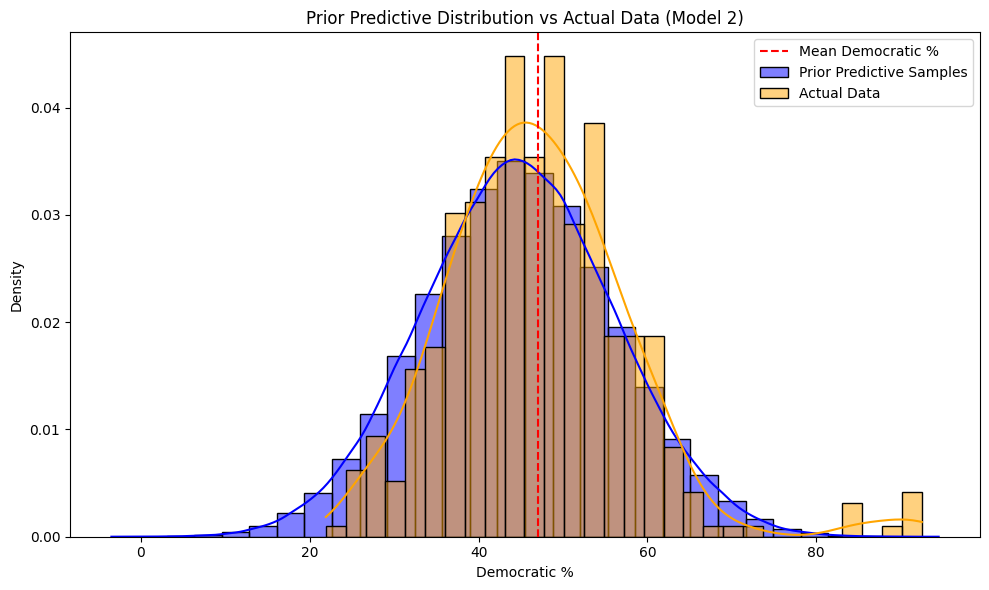

In [24]:
# Plot the prior predictive samples and actual data using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(y_rep_prior_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Prior Predictive Samples', color='blue')
sns.histplot(data['Democratic %'].values * 100, bins=30, kde=True, stat="density", alpha=0.5, label='Actual Data', color='orange')

# Add mean line
mean_democratic_pct = data['Democratic %'].mean() * 100
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')

# Customize the plot
plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Prior Predictive Distribution vs Actual Data (Model 2)')
plt.tight_layout()
plt.show()